In [1]:
import numpy as np                    
import pandas as pd                  
import matplotlib.pyplot as plt     
import seaborn as sns                 
import warnings
warnings.simplefilter('ignore')       
%matplotlib inline  

from matplotlib import rcParams     
from matplotlib.cm import rainbow 

In [3]:
from sklearn.preprocessing import StandardScaler 

In [5]:
data = pd.read_csv('C:\\Users\\KAVYA\\breast cancer.csv')

In [7]:
print("This dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

data.head()

This dataset contains 569 rows and 32 columns


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
print("This dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()


This dataset contains 569 rows and 32 columns


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data.info()
# Check for existing null values
total_null_values = sum(data.isnull().sum())
print(total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [17]:
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


<Axes: ylabel='count'>

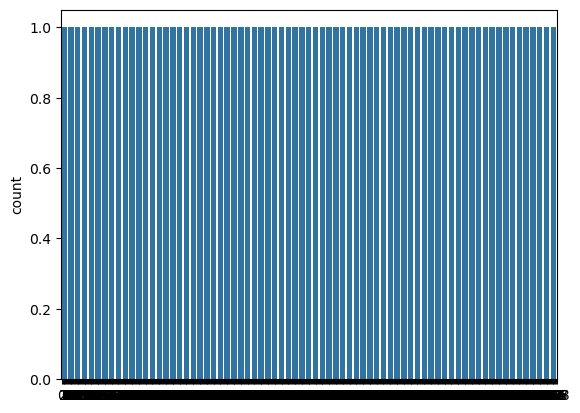

In [21]:
sns.countplot(data['diagnosis'],label="Count")

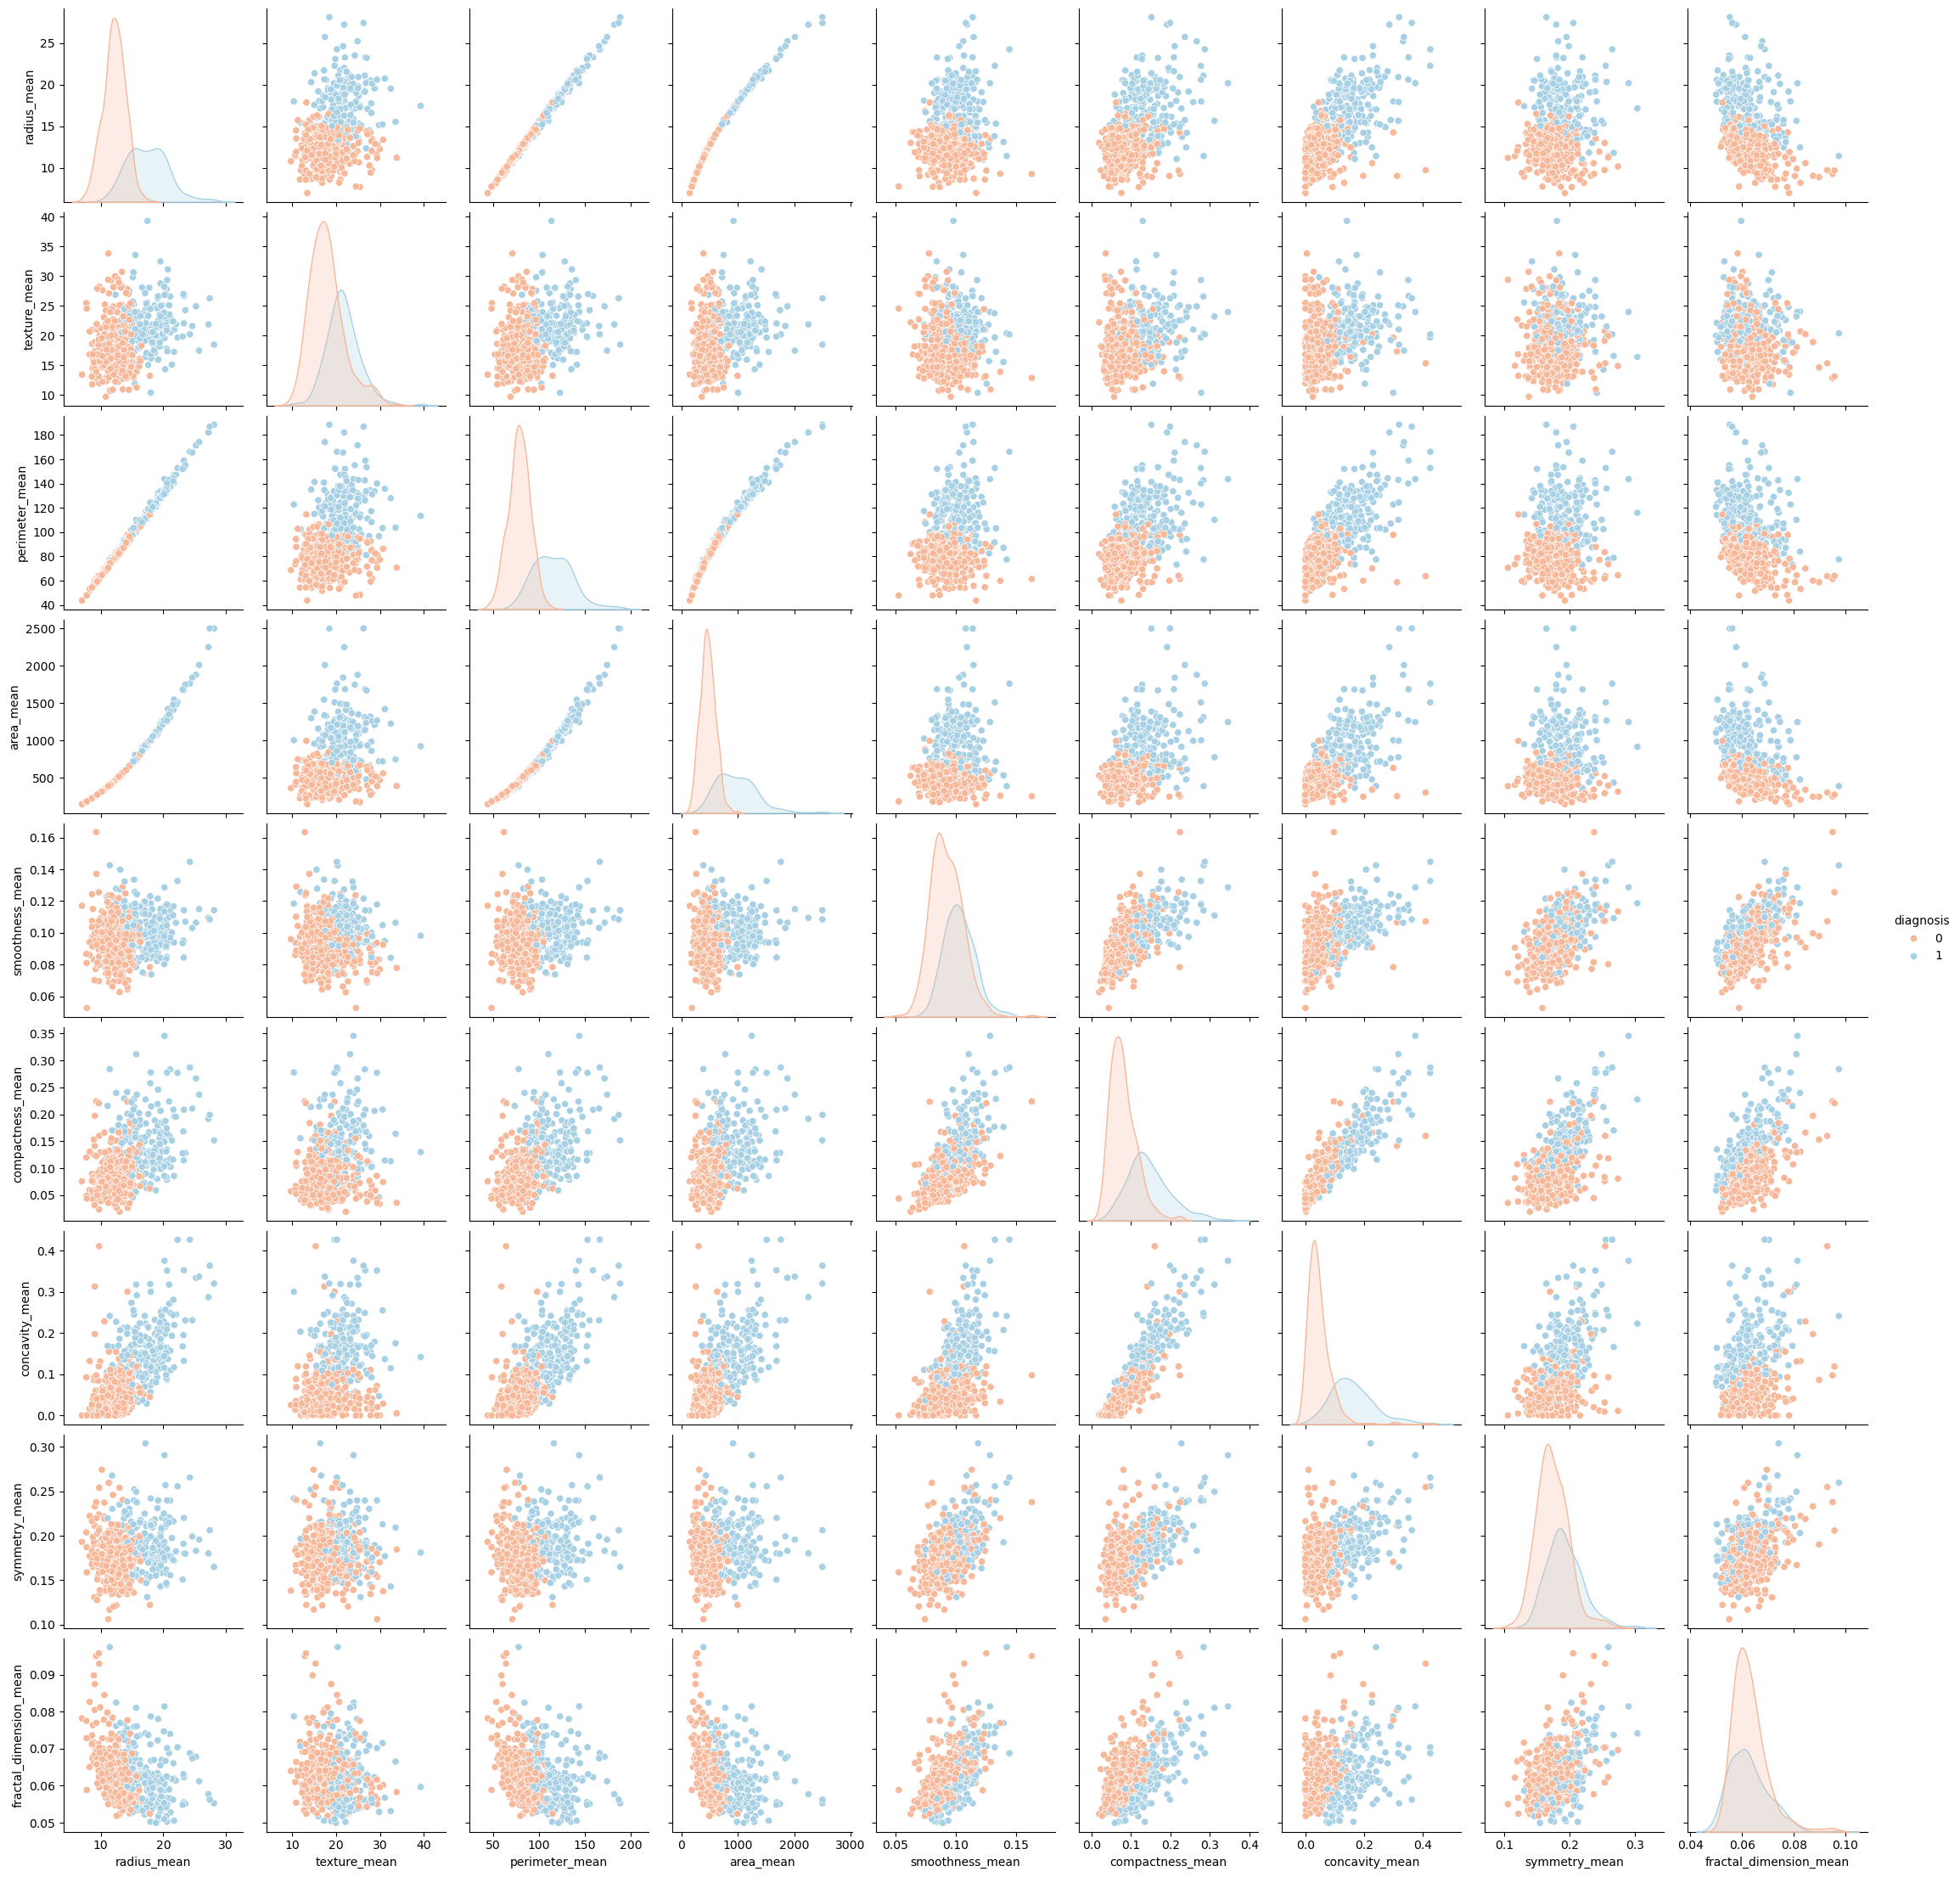

In [23]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean', 
        'symmetry_mean',
        'fractal_dimension_mean'
       ]

sns.pairplot(data = data[cols], hue = 'diagnosis', palette = 'RdBu')

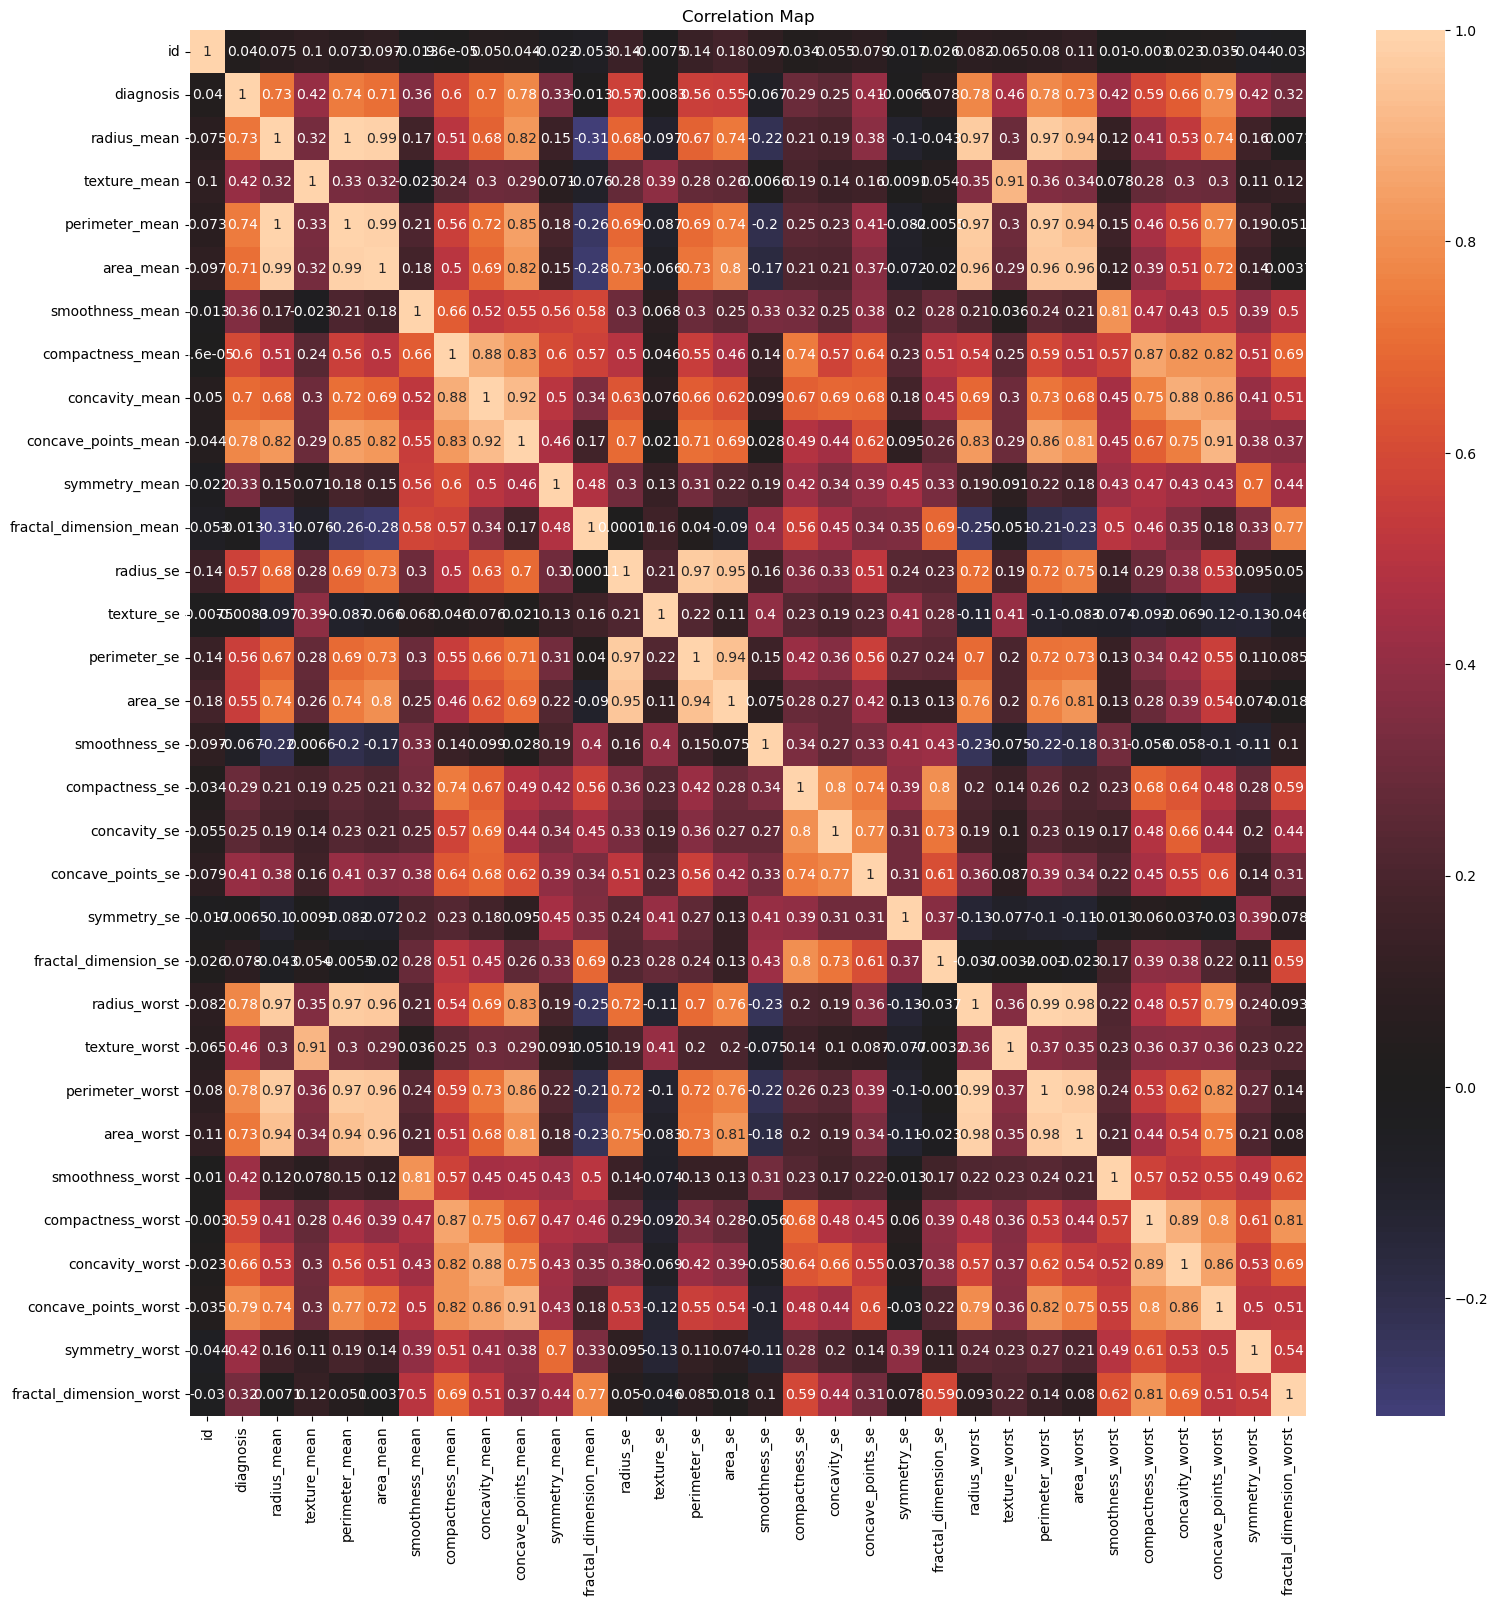

In [25]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(), center=0, annot=True ) 
plt.title('Correlation Map')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X=data.drop('diagnosis',axis=1,inplace=False)

# Assign 'diagnosis' column to Y varible
y=data['diagnosis']

print(X.head(2))
print(y.head(2))


# Seperate the data set  for training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print(X_train.shape,' \t is the shape of Training Features')
print(y_train.shape,'  \t is the shape of Training Lables')
print(X_test.shape,'   \t is the shape of Testing Features')
print(y_train.shape,' \t is the shape of Testing Lables')

       id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302        17.99         10.38           122.8     1001.0   
1  842517        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1   

In [29]:
# Implementation of KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
from sklearn.model_selection import cross_val_score                         

neighbors = []                                                              
cv_scores = []                  

for k in range(1, 51, 2):                                                  
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k)                            
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean())   
    
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)   

[0.40350877 0.47368421 0.28070175 0.36842105 0.33333333 0.56140351
 0.63157895 0.63157895 0.57894737 0.60714286]


The optimal number of K neighbors = 1 


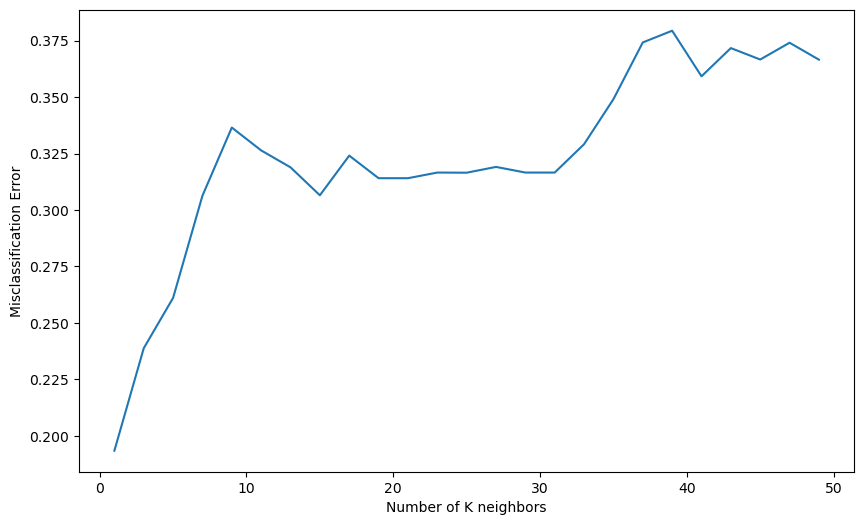

In [33]:
MSE = [1-x for x in cv_scores]                                               

# Determining the best k value
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d ' %optimal_k)
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [35]:
model=KNeighborsClassifier(n_neighbors=13)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report

print("Classification Report : \n\n")
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.71      0.87      0.78       108
           1       0.63      0.38      0.48        63

    accuracy                           0.69       171
   macro avg       0.67      0.63      0.63       171
weighted avg       0.68      0.69      0.67       171



In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy of breast cancer prediction using KNN =',accuracy_score(y_pred,y_test)*100)

Accuracy of breast cancer prediction using KNN = 69.00584795321637


Text(113.9222222222222, 0.5, 'predicted class')

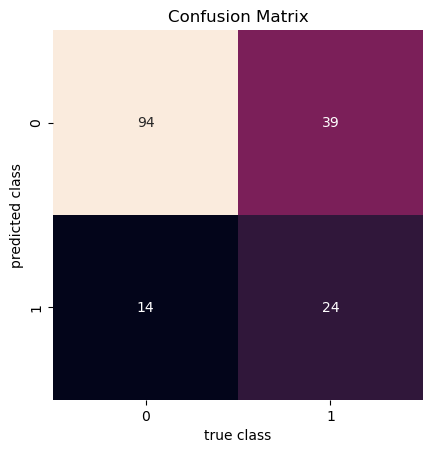

In [39]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(y_test, y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 

plt.title('Confusion Matrix')
plt.xlabel('true class') 
plt.ylabel('predicted class')